In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [2]:
df=pd.read_csv("dataframe_final.csv",sep=",")

In [3]:
df.drop(columns=["Tasa interanual del IPI"], inplace=True)

In [4]:
df.columns

Index(['Any', 'Mes', 'Dia', 'Tram_Horari', 'Codi_Postal', 'Valor',
       'temperature_2m', 'apparent_temperature', 'rain', 'wind_speed_10m',
       'is_day', 'sunshine_duration', 'direct_radiation', 'Dia_Setmana',
       'Festiu', 'dew_point_2m'],
      dtype='object')

In [ ]:
df_anova = df[['Any', 'Mes', 'Dia', 'Tram_Horari', 'Codi_Postal','rain', 'is_day', 'Dia_Setmana', 'Festiu', "Valor"]]

### Welch’s Test

In [9]:
from scipy import stats

# Welch’s t-test (para variables binarias)

# rain
group_rain_0 = df_anova[df_anova['rain'] == 0]['Valor']
group_rain_1 = df_anova[df_anova['rain'] == 1]['Valor']
t_stat_rain, p_val_rain = stats.ttest_ind(group_rain_0, group_rain_1, equal_var=False)
print("Welch’s t-test (rain):")
print("t =", t_stat_rain)
print("p =", p_val_rain)

# is_day
group_day_0 = df_anova[df_anova['is_day'] == 0]['Valor']
group_day_1 = df_anova[df_anova['is_day'] == 1]['Valor']
t_stat_day, p_val_day = stats.ttest_ind(group_day_0, group_day_1, equal_var=False)
print("\nWelch’s t-test (is_day):")
print("t =", t_stat_day)
print("p =", p_val_day)

# Festiu
group_festiu_0 = df_anova[df_anova['Festiu'] == 0]['Valor']
group_festiu_1 = df_anova[df_anova['Festiu'] == 1]['Valor']
t_stat_festiu, p_val_festiu = stats.ttest_ind(group_festiu_0, group_festiu_1, equal_var=False)
print("\nWelch’s t-test (Festiu):")
print("t =", t_stat_festiu)
print("p =", p_val_festiu)


Welch’s t-test (rain):
t = -7.440473126375821
p = 1.0100621704499002e-13

Welch’s t-test (is_day):
t = -124.23877187714108
p = 0.0

Welch’s t-test (Festiu):
t = 39.49708917291632
p = 0.0


Les tres variables categòriques analitzades tenen un impacte clar i fort sobre la variable contínua Valor.

### ANOVA

In [11]:
# Lista de variables categóricas a analizar con ANOVA
variables_binarias = ['Festiu', 'is_day', 'rain']

for var in variables_binarias:
    grupos = [group['Valor'].values for _, group in df_anova.groupby(var)]
    f_stat, p_value = stats.f_oneway(*grupos)
    print(f"\nANOVA per {var}:")
    print("F =", f_stat)
    print("p =", p_value)

variables_multinivell = ['Any','Mes','Dia','Dia_Setmana', 'Tram_Horari', 'Codi_Postal']
for var in variables_multinivell:
    grupos = [group['Valor'].values for _, group in df_anova.groupby(var)]
    f_stat, p_value = stats.f_oneway(*grupos)
    print(f"\nANOVA per {var}:")
    print("F =", f_stat)
    print("p =", p_value)


C:\Users\Afran\AppData\Local\Temp\ipykernel_50384\609991187.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupos = [group['Valor'].values for _, group in df_anova.groupby(var)]



ANOVA per Festiu:
F = 1005.4385906409951
p = 2.4406536930332503e-220

ANOVA per is_day:
F = 15199.932457729636
p = 0.0

ANOVA per rain:
F = 55.088392546461044
p = 1.1548990222707683e-13

ANOVA per Any:
F = 781.106769612019
p = 0.0

ANOVA per Mes:
F = 660.9700944764111
p = 0.0

ANOVA per Dia:
F = 5.09208226017224
p = 2.1915873362883884e-18

ANOVA per Dia_Setmana:
F = 1125.8877853428296
p = 0.0

ANOVA per Tram_Horari:
F = 13217.259677730957
p = 0.0

ANOVA per Codi_Postal:
F = 14758.647825228534
p = 0.0


C:\Users\Afran\AppData\Local\Temp\ipykernel_50384\609991187.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupos = [group['Valor'].values for _, group in df_anova.groupby(var)]


Els valors F molt alts i els p-values pràcticament zero indiquen que les mitjanes del valor Valor difereixen molt significativament entre els grups de cada variable categòrica.

Això confirma que festiu, si és de dia o no, i pluja són factors molt importants que afecten el consum o la variable Valor.

ANOVA multifactorial

In [12]:
# Assegura que les variables categòriques siguin de tipus 'category'
df_anova['rain'] = df_anova['rain'].astype('category')
df_anova['Festiu'] = df_anova['Festiu'].astype('category')
df_anova['is_day'] = df_anova['is_day'].astype('category')
df_anova['Dia_Setmana'] = df_anova['Dia_Setmana'].astype('category')
df_anova['Tram_Horari'] = df_anova['Tram_Horari'].astype('category')
df_anova['Codi_Postal'] = df_anova['Codi_Postal'].astype('category')
df_anova['Any'] = df_anova['Any'].astype('category')
df_anova['Mes'] = df_anova['Mes'].astype('category')
df_anova['Dia'] = df_anova['Dia'].astype('category')

# Model lineal amb variables categòriques i numèriques
model = smf.ols('Valor ~ C(rain) + C(Festiu) + C(is_day) + C(Dia_Setmana) + C(Tram_Horari) + C(Codi_Postal) + Any + Mes + Dia', data=df_anova).fit()

# Taula ANOVA de tipus II
anova_table = sm.stats.anova_lm(model, typ=2)

# Mostra la taula
print(anova_table)

C:\Users\Afran\AppData\Local\Temp\ipykernel_50384\3551455923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anova['rain'] = df_anova['rain'].astype('category')
C:\Users\Afran\AppData\Local\Temp\ipykernel_50384\3551455923.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anova['Festiu'] = df_anova['Festiu'].astype('category')
C:\Users\Afran\AppData\Local\Temp\ipykernel_50384\3551455923.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

                      sum_sq        df             F         PR(>F)
C(rain)         4.201098e+10       1.0     63.664513   1.479618e-15
C(Festiu)       3.186467e+12       1.0   4828.853190   0.000000e+00
C(is_day)       4.870894e+11       1.0    738.147771  2.242732e-162
C(Dia_Setmana)  2.210173e+13       6.0   5582.253585   0.000000e+00
C(Tram_Horari)  5.556892e+13       3.0  28070.187634   0.000000e+00
C(Codi_Postal)  7.109402e+14      41.0  26277.487283   0.000000e+00
Any             1.327848e+13       5.0   4024.509151   0.000000e+00
Mes             2.375016e+13      11.0   3271.963924   0.000000e+00
Dia             2.374827e+11      30.0     11.996247   3.566716e-58
Residual        2.295923e+14  347930.0           NaN            NaN


### Post-hoc test Tukey HSD

In [13]:
print("Festiu vs Valor:", pairwise_tukeyhsd(endog=df['Valor'], groups=df['Festiu'], alpha=0.05).summary())

print("Rain vs Valor:", pairwise_tukeyhsd(endog=df['Valor'], groups=df['rain'], alpha=0.05).summary())

print("És de dia vs Valor:", pairwise_tukeyhsd(endog=df['Valor'], groups=df['is_day'], alpha=0.05).summary())

print("Dia de la setmana vs Valor:", pairwise_tukeyhsd(endog=df['Valor'], groups=df['Dia_Setmana'], alpha=0.05).summary())

print("Tram horari vs Valor:", pairwise_tukeyhsd(endog=df['Valor'], groups=df['Tram_Horari'], alpha=0.05).summary())

print("Codi postal vs Valor:", pairwise_tukeyhsd(endog=df['Valor'], groups=df['Codi_Postal'], alpha=0.05).summary())

Festiu vs Valor:      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
 False   True -15409.1114   0.0 -16361.5739 -14456.6488   True
--------------------------------------------------------------
Rain vs Valor:  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2  meandiff p-adj  lower    upper   reject
------------------------------------------------------
 False   True 1741.5637   0.0 1281.67 2201.4573   True
------------------------------------------------------
És de dia vs Valor:    Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower      upper   reject
---------------------------------------------------------
 False   True 23207.131   0.0 22838.1969 23576.065   True
---------------------------------------------------------
Dia de la setmana vs Valor:       Multiple Comparison of Means - Tuk

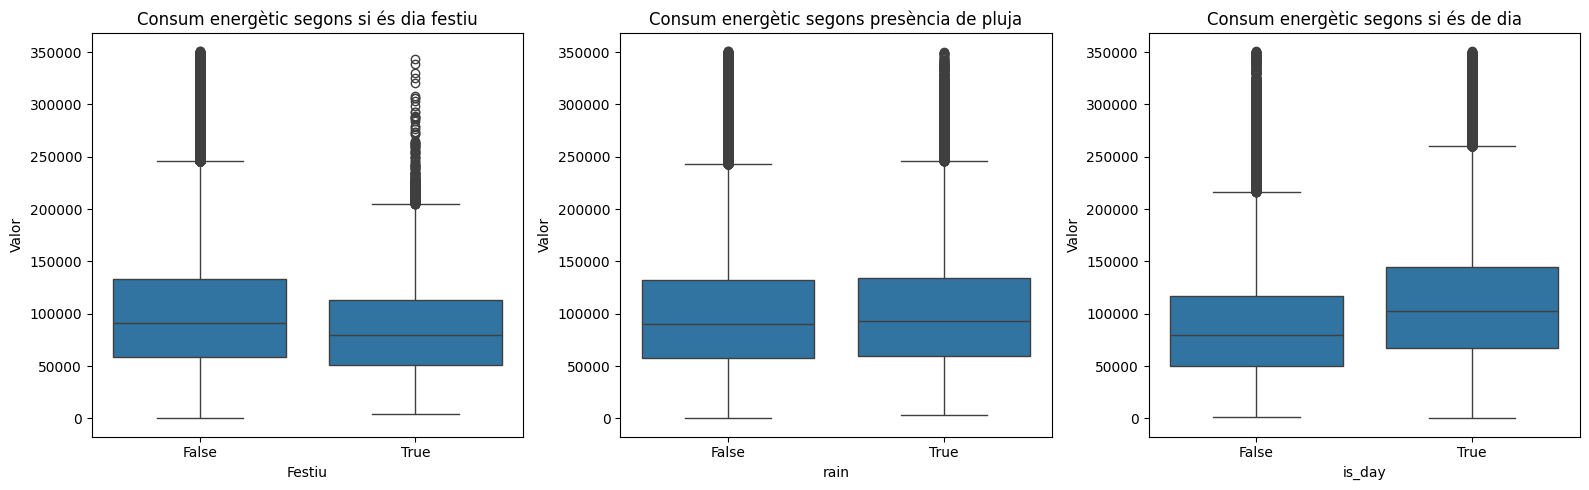

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))  # 1 fila, 3 columnes

# Boxplot per 'Festiu'
sns.boxplot(x='Festiu', y='Valor', data=df, ax=axes[0])
axes[0].set_title('Consum energètic segons si és dia festiu')

# Boxplot per 'rain'
sns.boxplot(x='rain', y='Valor', data=df, ax=axes[1])
axes[1].set_title('Consum energètic segons presència de pluja')

# Boxplot per 'is_day'
sns.boxplot(x='is_day', y='Valor', data=df, ax=axes[2])
axes[2].set_title('Consum energètic segons si és de dia')

plt.tight_layout()
plt.show()